In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl import load_workbook
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [3]:
# load behavior data
paths = 'C:\\Users\\jlai\\OneDrive\\HR_loss\\'
fname = 'RotmanSIN_subjects_demo_behav.xlsx'

sub_demo=pd.read_excel(paths+fname,engine='openpyxl', sheet_name='Sheet1',usecols='A:AF')
sub_demo

,Document Information Study # 561,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Audiogram,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,BEHAVIORAL DATA,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right,NaN,NaN,NaN,NaN,NaN,Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clean,NaN,NaN,NaN,noise,NaN
1,Participant ID,Subject #,Date (MM/DD/YYYY),Gender,Age,Quick Sin Scores,NaN,NaN,NaN,avg,250,500.0,1000.0,2000.0,4000.0,8000.0,250,500.0,1000.0,2000.0,4000.0,8000.0,avg,PTA,Hearing loss based on AVG,NaN,PC (%),RT (ms),throughput (%/ms),NaN,PC (%),RT (ms)
2,ca,1,2015-11-13 00:00:00,M,52,-4.5,2.5,0.5,1.5,0,10,15.0,20.0,20.0,15.0,10.0,10,5.0,20.0,25.0,0.0,-5.0,12.083333,17.5,False,NaN,83.374398,503.543333,0.165575,NaN,70.880231,601.93881
3,11385,2,2015-11-20 00:00:00,F,66,0.5,0.5,5.5,0.5,1.75,15,10.0,10.0,-5.0,20.0,50.0,0,15.0,10.0,10.0,5.0,55.0,16.25,8.333333,False,NaN,94.090278,550.94381,0.17078,NaN,97.4093,525.07381
4,12065,3,2015-11-24 00:00:00,F,68,5.5,2.5,0.5,1.5,2.5,30,20.0,15.0,15.0,40.0,15.0,25,20.0,15.0,15.0,25.0,35.0,22.5,16.666667,False,NaN,94.535427,476.661667,0.198328,NaN,78.697832,459.847857
5,9702,4,2015-11-30 00:00:00,F,74,4.5,9.5,8.5,4.5,6.75,60,45.0,25.0,20.0,30.0,60.0,65,50.0,30.0,20.0,50.0,70.0,43.75,31.666667,True,NaN,49.268539,515.64381,0.095548,NaN,52.538879,562.597857
6,4822,5,2015-12-01 00:00:00,F,72,5.5,-3.5,8.5,0.5,2.75,25,25.0,30.0,35.0,40.0,70.0,30,30.0,35.0,40.0,55.0,80.0,41.25,32.5,True,NaN,88.597568,566.498095,0.156395,NaN,90.507215,611.038571
7,8023,6,2015-12-03 00:00:00,M,70,10.5,11.5,5.5,6.5,8.5,40,45.0,45.0,45.0,50.0,60.0,40,40.0,40.0,55.0,55.0,75.0,49.166667,45,True,NaN,72.634427,505.693095,0.143633,NaN,95.099045,520.474286
8,12603,7,12/09/1015,M,75,0.5,5.5,4.5,0.5,2.75,25,35.0,30.0,40.0,55.0,65.0,30,30.0,40.0,50.0,70.0,75.0,45.416667,37.5,True,NaN,93.022344,477.599765,0.19477,NaN,91.675165,479.103286
9,11591,8,2015-12-11 00:00:00,F,72,1.5,1.5,1.5,5.5,2.5,15,10.0,15.0,15.0,25.0,25.0,15,10.0,5.0,15.0,10.0,35.0,16.25,11.666667,False,NaN,97.127295,593.109155,0.16376,NaN,96.638655,615.833803


In [4]:
# NH or HL
sub_hearing=sub_demo[['Document Information Study # 561','Unnamed: 24']]

sub_hearing.columns=sub_hearing.iloc[1]
sub_hearing.drop(sub_hearing.index[0:2],inplace=True)
# convert sub 'ca' to 0
sub_hearing.loc[2,'Participant ID']=0
sub_hearing.loc[2,:]

NH=sub_hearing[sub_hearing['Hearing loss  based on AVG']==False]
HL=sub_hearing[sub_hearing['Hearing loss  based on AVG']==True]

In [5]:
# QuickSIN scores
Qsin=sub_demo[['Document Information Study # 561','Unnamed: 9']]
Qsin.columns=Qsin.iloc[1]
Qsin.drop(Qsin.index[0:2],inplace=True)
# convert sub 'ca' to 0
Qsin.loc[2,'Participant ID']=0
Qsin=Qsin.rename(columns={'avg':'QuickSIN'})

# clean behavior
clean_test=sub_demo[['Document Information Study # 561','BEHAVIORAL DATA','Unnamed: 27']]
clean_test.columns=clean_test.iloc[1]
clean_test.drop(clean_test.index[0:2],inplace=True)
# convert sub 'ca' to 0
clean_test.loc[2,'Participant ID']=0

# noise behavior
noise_test=sub_demo[['Document Information Study # 561','Unnamed: 30','Unnamed: 31']]
noise_test.columns=noise_test.iloc[1]
noise_test.drop(noise_test.index[0:2],inplace=True)
# convert sub 'ca' to 0
noise_test.loc[2,'Participant ID']=0

# average of PTA
pta=sub_demo[['Document Information Study # 561','Unnamed: 23']]
pta.columns=pta.iloc[1]
pta.drop(pta.index[0:2],inplace=True)
# convert sub 'ca' to 0
pta.loc[2,'Participant ID']=0
pta=pta.rename(columns={'avg':'HT'})

In [6]:
pta

1,Participant ID,PTA
2,0,17.5
3,11385,8.333333
4,12065,16.666667
5,9702,31.666667
6,4822,32.5
7,8023,45
8,12603,37.5
9,11591,11.666667
10,13005,15
11,13037,16.666667


In [7]:
# age 
age=sub_demo[['Document Information Study # 561','Unnamed: 4']]
age.columns=age.iloc[1]
age.drop(age.index[0:2],inplace=True)
# convert sub 'ca' to 0
age.loc[2,'Participant ID']=0
age

1,Participant ID,Age
2,0,52
3,11385,66
4,12065,68
5,9702,74
6,4822,72
7,8023,70
8,12603,75
9,11591,72
10,13005,71
11,13037,68


In [8]:
clean_test['QuickSIN']=Qsin['QuickSIN']
clean_test['PTA']=pta['PTA']
clean_test['SNR']='clean'
clean_test['HL']=sub_hearing['Hearing loss  based on AVG']
clean_test['age']=age['Age']

noise_test['QuickSIN']=Qsin['QuickSIN']
noise_test['PTA']=pta['PTA']
noise_test['SNR']='noise'
noise_test['HL']=sub_hearing['Hearing loss  based on AVG']
noise_test['age']=age['Age']

In [9]:
clean_test

1,Participant ID,PC (%),RT (ms),QuickSIN,PTA,SNR,HL,age
2,0,83.374398,503.543333,0,17.5,clean,False,52
3,11385,94.090278,550.94381,1.75,8.333333,clean,False,66
4,12065,94.535427,476.661667,2.5,16.666667,clean,False,68
5,9702,49.268539,515.64381,6.75,31.666667,clean,True,74
6,4822,88.597568,566.498095,2.75,32.5,clean,True,72
7,8023,72.634427,505.693095,8.5,45,clean,True,70
8,12603,93.022344,477.599765,2.75,37.5,clean,True,75
9,11591,97.127295,593.109155,2.5,11.666667,clean,False,72
10,13005,84.42816,506.600469,1,15,clean,False,71
11,13037,92.613086,501.061033,1.5,16.666667,clean,False,68


In [10]:
# load FFTamp data
path='C:\\Users\\jlai\\OneDrive\\HR_loss\\FFRs_FFT\\'
freq=150
band='alpha' # alpha/beta
FFTamp_NH_df=pd.read_csv(path+'poz_'+band+'_NH_FFTamp.csv',index_col=0)
FFTamp_HL_df=pd.read_csv(path+'poz_'+band+'_HL_FFTamp.csv',index_col=0)
FFTamp_NH_df

,sub,NH_clean_lowalpha,NH_clean_hialpha,NH_noise_lowalpha,NH_noise_hialpha,NH_clean_hi/lo,NH_noise_hi/lo
0,0.0,1.792534e-08,3.589772e-08,4.280711e-08,4.890840e-08,2.002624,1.142530
1,11385.0,7.725888e-08,5.692417e-08,1.177359e-07,4.505014e-08,0.736798,0.382637
2,12065.0,6.225596e-08,5.259579e-08,8.256805e-08,6.234360e-08,0.844831,0.755057
3,11591.0,7.650204e-08,6.614792e-08,8.133988e-08,1.083089e-07,0.864656,1.331560
4,13005.0,7.662090e-08,7.303978e-08,1.350765e-08,4.850599e-08,0.953262,3.591003
5,13037.0,2.473235e-08,1.064250e-07,3.970177e-08,5.158741e-08,4.303069,1.299373
6,2330.0,2.087710e-08,2.923712e-08,1.180052e-07,4.369470e-08,1.400439,0.370278
7,7160.0,4.978007e-08,8.165917e-08,3.123952e-08,5.207550e-08,1.640399,1.666975
8,11869.0,2.004671e-08,7.822783e-08,8.632040e-08,1.969253e-08,3.902277,0.228133
9,11603.0,3.885352e-08,8.901156e-08,5.198276e-08,9.839706e-08,2.290952,1.892879


In [11]:
# reorganize data
data_clean=pd.DataFrame(np.nan,index=np.arange(64),columns=['sub','snr','HL','hi/lo','FFTamp'])
data_noise=pd.DataFrame(np.nan,index=np.arange(64),columns=['sub','snr','HL','hi/lo','FFTamp'])

In [12]:
# Clean condition
# NH high
for dd in range(len(FFTamp_NH_df)):
    data_clean['sub'][dd]=FFTamp_NH_df['sub'][dd]
    data_clean['snr'][dd]='clean' #'clean'
    data_clean['HL'][dd]=0 #NH
    data_clean['hi/lo'][dd]='hi'
    data_clean['FFTamp'][dd]=FFTamp_NH_df['NH_clean_hi'+band][dd]
# NH low 
n=0
for dd in range(len(FFTamp_NH_df),len(FFTamp_NH_df)+len(FFTamp_NH_df)):
    data_clean['sub'][dd]=FFTamp_NH_df['sub'][n]
    data_clean['snr'][dd]='clean' #'clean'
    data_clean['HL'][dd]=0 #NH
    data_clean['hi/lo'][dd]='lo'   
    data_clean['FFTamp'][dd]=FFTamp_NH_df['NH_clean_low'+band][n]
    n=n+1

# HL high
n=0
for dd in range(len(FFTamp_NH_df)*2,len(FFTamp_NH_df)*2+len(FFTamp_HL_df)):
    data_clean['sub'][dd]=FFTamp_HL_df['sub'][n]
    data_clean['snr'][dd]='clean' #'clean'
    data_clean['HL'][dd]=1 #HL
    data_clean['hi/lo'][dd]='hi'
    data_clean['FFTamp'][dd]=FFTamp_HL_df['HL_clean_hi'+band][n]
    n+=1
# HL low 
n=0
for dd in range(len(FFTamp_NH_df)*2+len(FFTamp_HL_df),len(FFTamp_NH_df)*2+len(FFTamp_HL_df)*2):
    data_clean['sub'][dd]=FFTamp_HL_df['sub'][n]
    data_clean['snr'][dd]='clean' #'clean'
    data_clean['HL'][dd]=1 #HL
    data_clean['hi/lo'][dd]='lo'   
    data_clean['FFTamp'][dd]=FFTamp_HL_df['HL_clean_low'+band][n]
    n+=1

# Noise condition
# NH high
for dd in range(len(FFTamp_NH_df)):
    data_noise['sub'][dd]=FFTamp_NH_df['sub'][dd]
    data_noise['snr'][dd]='noise' #'noise'
    data_noise['HL'][dd]=0 #NH
    data_noise['hi/lo'][dd]='hi'
    data_noise['FFTamp'][dd]=FFTamp_NH_df['NH_noise_hi'+band][dd]
# NH low 
n=0
for dd in range(len(FFTamp_NH_df),len(FFTamp_NH_df)+len(FFTamp_NH_df)):
    data_noise['sub'][dd]=FFTamp_NH_df['sub'][n]
    data_noise['snr'][dd]='noise' #'noise'
    data_noise['HL'][dd]=0 #NH
    data_noise['hi/lo'][dd]='lo'   
    data_noise['FFTamp'][dd]=FFTamp_NH_df['NH_noise_low'+band][n]
    n+=1

# HL high
n=0
for dd in range(len(FFTamp_NH_df)*2,len(FFTamp_NH_df)*2+len(FFTamp_HL_df)):
    data_noise['sub'][dd]=FFTamp_HL_df['sub'][n]
    data_noise['snr'][dd]='noise' #'noise'
    data_noise['HL'][dd]=1 #HL
    data_noise['hi/lo'][dd]='hi'
    data_noise['FFTamp'][dd]=FFTamp_HL_df['HL_noise_hi'+band][n]
    n+=1
# HL low 
n=0
for dd in range(len(FFTamp_NH_df)*2+len(FFTamp_HL_df),len(FFTamp_NH_df)*2+len(FFTamp_HL_df)*2):
    data_noise['sub'][dd]=FFTamp_HL_df['sub'][n]
    data_noise['snr'][dd]='noise' #'noise'
    data_noise['HL'][dd]=1 #HL
    data_noise['hi/lo'][dd]='lo'   
    data_noise['FFTamp'][dd]=FFTamp_HL_df['HL_noise_low'+band][n]
    n+=1

In [13]:
#Clean
data_clean['QuickSIN']=0
data_clean['PTA']=0
data_clean['PC (%)']=0
data_clean['RT (ms)']=0
data_clean['Age']=0

for nn in range(len(data_clean)):
    sub=int(data_clean['sub'][nn])
    sub_id=Qsin[Qsin['Participant ID']==sub].index
    data_clean.loc[nn,'QuickSIN']=Qsin.loc[sub_id[0],'QuickSIN']
    data_clean.loc[nn,'PTA']=pta.loc[sub_id[0],'PTA']
    data_clean.loc[nn,'PC (%)']=clean_test.loc[sub_id[0],'PC (%)']
    data_clean.loc[nn,'RT (ms)']=clean_test.loc[sub_id[0],'RT (ms)']
    data_clean.loc[nn,'Age']=age.loc[sub_id[0],'Age']

#Noise
data_noise['QuickSIN']=0
data_noise['PTA']=0
data_noise['PC (%)']=0
data_noise['RT (ms)']=0
data_noise['Age']=0

for nn in range(len(data_noise)):
    sub=int(data_noise['sub'][nn])
    sub_id=Qsin[Qsin['Participant ID']==sub].index
    data_noise.loc[nn,'QuickSIN']=Qsin.loc[sub_id[0],'QuickSIN']
    data_noise.loc[nn,'PTA']=pta.loc[sub_id[0],'PTA']
    data_noise.loc[nn,'PC (%)']=noise_test.loc[sub_id[0],'PC (%)']
    data_noise.loc[nn,'RT (ms)']=noise_test.loc[sub_id[0],'RT (ms)']
    data_noise.loc[nn,'Age']=age.loc[sub_id[0],'Age']

In [14]:
all_data_noise=data_noise
all_data_clean=data_clean
all_data=pd.concat([data_noise, data_clean],axis=0,ignore_index=True)

In [15]:
#data_clean

## Linear regression model

In [31]:
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
# y~tone.avg+group+tone.avgXgroup
# data for model fitting and interaction factor
x1='PTA'
data=all_data[['FFTamp',x1,'HL','hi/lo','snr','sub','Age']]
data['interact']=all_data[x1]*all_data['HL']
data

,FFTamp,PTA,HL,hi/lo,snr,sub,Age,interact
0,4.890840e-08,17.500000,0.0,hi,noise,0.0,52,0.000000
1,4.505014e-08,8.333333,0.0,hi,noise,11385.0,66,0.000000
2,6.234360e-08,16.666667,0.0,hi,noise,12065.0,68,0.000000
3,1.083089e-07,11.666667,0.0,hi,noise,11591.0,72,0.000000
4,4.850599e-08,15.000000,0.0,hi,noise,13005.0,71,0.000000
...,...,...,...,...,...,...,...,...
123,9.371133e-08,20.833333,1.0,lo,clean,4628.0,75,20.833333
124,2.089008e-08,29.166667,1.0,lo,clean,11257.0,75,29.166667
125,6.466686e-08,28.333333,1.0,lo,clean,11479.0,70,28.333333
126,3.507599e-08,32.500000,1.0,lo,clean,11612.0,63,32.500000


In [18]:
# Clean and low
data_clean=data[(data['snr']=='clean') & (data['hi/lo']=='lo')]
len(data_clean)

32

In [19]:
#data_clean

In [20]:
# add in performance level/rank
#data_clean['PC_rank']=0

#for sub in data_clean.index:
#    low= data_clean['PC (%)'].quantile(q=0.3) # lower quantile
#    up= data_clean['PC (%)'].quantile(q=0.7) # upper quantile
#    med = data_clean['PC (%)'].quantile(q=0.5) # med
#    if data_clean['PC (%)'][sub]<=low:
#        data_clean['PC_rank'][sub]=0
#    elif data_clean['PC (%)'][sub]>low and data_clean['PC (%)'][sub]<up:
#        data_clean['PC_rank'][sub]=2
#    elif data_clean['PC (%)'][sub]>=up:
#        data_clean['PC_rank'][sub]=1

In [21]:
X_clean=data_clean[[x1,'HL','interact','Age']]
Y_clean=data_clean['FFTamp']

In [22]:
# noise and low
data_noise=data[(data['snr']=='noise') & (data['hi/lo']=='lo')]
len(data_noise)

32

In [23]:
# add in performance level/rank
#data_noise['PC_rank']=0

#for sub in data_noise.index:
#    low= data_noise['PC (%)'].quantile(q=0.3) # lower quantile
#    up= data_noise['PC (%)'].quantile(q=0.7) # upper quantile
#    med = data_noise['PC (%)'].quantile(q=0.5) # med
#    if data_noise['PC (%)'][sub]<=low:
#        data_noise['PC_rank'][sub]=0
#    elif data_noise['PC (%)'][sub]>low and data_noise['PC (%)'][sub]<up:
#        data_noise['PC_rank'][sub]=2
#    elif data_noise['PC (%)'][sub]>=up:
#        data_noise['PC_rank'][sub]=1

In [25]:
X_noise=data_noise[[x1,'HL','interact','Age']]
Y_noise=data_noise['FFTamp']

In [26]:
# clean+noise and low
data_lo=data[data['hi/lo']=='lo']
len(data_lo)

64

In [27]:
# add in performance level/rank
#data_lo['PC_rank']=0

#for sub in data_lo.index:
#    low= data_lo['PC (%)'].quantile(q=0.3) # lower quantile
#    up= data_lo['PC (%)'].quantile(q=0.7) # upper quantile
#    med = data_lo['PC (%)'].quantile(q=0.5) # med
#    if data_lo['PC (%)'][sub]<=low:
#        data_lo['PC_rank'][sub]=0
#    elif data_lo['PC (%)'][sub]>low and data_lo['PC (%)'][sub]<up:
#        data_lo['PC_rank'][sub]=2
#    elif data_lo['PC (%)'][sub]>=up:
#        data_lo['PC_rank'][sub]=1

In [28]:
X_lo=data_lo[[x1,'HL','interact','Age']]
Y_lo=data_lo['FFTamp']

In [29]:
#X_lo

In [32]:
# model with interaction factor
X_clean= sm.add_constant(X_clean)
ls_clean=sm.OLS(Y_clean,X_clean).fit()
ls_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FFTamp   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4.685
Date:                Thu, 05 Jan 2023   Prob (F-statistic):            0.00530
Time:                        11:32:59   Log-Likelihood:                 516.70
No. Observations:                  32   AIC:                            -1023.
Df Residuals:                      27   BIC:                            -1016.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.244e-08   7.13e-08      0.455      0.653   -1.14e-07    1.79e-07
PTA        -2.832e-09   2.28e-09     -1.245      0.224    -7.5e-09    1.84e-09
HL          4.395e-08   4.24e-08      1.036      0.309   -4.31e-08    1.31e-07
interact    3.907e-10   2.44e-09      0.160      0.874   -4.62e-09    5.41e-09
Age          8.65e-10    8.7e-10      0.995      0.329    -9.2e-10    2.65e-09
==============================================================================
Omnibus:                        0.508   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.617
Skew:                           0.108   Prob(JB):                        0.735
Kurtosis:                       2.355   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
data_clean.columns

Index(['FFTamp', 'PTA', 'HL', 'hi/lo', 'snr', 'sub', 'Age', 'interact'], dtype='object')

In [34]:
#ls_clean1=smf.ols(formula='FFTamp ~ PTA + C(HL) + interact', data=data_clean).fit()
#ls_clean1.summary()

In [35]:
# model with main factors only
X_main_clean=X_clean[['const',x1,'HL']]
ls_main_clean=sm.OLS(Y_clean,X_main_clean).fit()
ls_main_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FFTamp   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     9.111
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           0.000851
Time:                        11:33:13   Log-Likelihood:                 516.07
No. Observations:                  32   AIC:                            -1026.
Df Residuals:                      29   BIC:                            -1022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.373e-08   1.39e-08      6.006      0.000    5.52e-08    1.12e-07
PTA         -2.44e-09   7.87e-10     -3.099      0.004   -4.05e-09    -8.3e-10
HL          5.355e-08   1.26e-08      4.264      0.000    2.79e-08    7.92e-08
==============================================================================
Omnibus:                        1.686   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.114
Skew:                           0.134   Prob(JB):                        0.573
Kurtosis:                       2.126   Cond. No.                         80.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_noise= sm.add_constant(X_noise)
ls_noise=sm.OLS(Y_noise,X_noise).fit()
ls_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FFTamp   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.090
Date:                Thu, 05 Jan 2023   Prob (F-statistic):              0.110
Time:                        11:33:16   Log-Likelihood:                 513.21
No. Observations:                  32   AIC:                            -1016.
Df Residuals:                      27   BIC:                            -1009.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.307e-07   7.95e-08      1.644      0.112   -3.24e-08    2.94e-07
PTA        -6.337e-09   2.54e-09     -2.497      0.019   -1.15e-08   -1.13e-09
HL         -1.156e-07   4.73e-08     -2.443      0.021   -2.13e-07   -1.85e-08
interact    6.517e-09   2.73e-09      2.391      0.024    9.24e-10    1.21e-08
Age         5.823e-10    9.7e-10      0.600      0.553   -1.41e-09    2.57e-09
==============================================================================
Omnibus:                        0.040   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.104
Skew:                           0.060   Prob(JB):                        0.949
Kurtosis:                       2.748   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# model with main factors only
X_main_noise=X_noise[['const',x1,'HL']]
ls_main_noise=sm.OLS(Y_noise,X_main_noise).fit()
ls_main_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FFTamp   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.7213
Date:                Thu, 05 Jan 2023   Prob (F-statistic):              0.495
Time:                        11:33:25   Log-Likelihood:                 509.67
No. Observations:                  32   AIC:                            -1013.
Df Residuals:                      29   BIC:                            -1009.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.145e-08    1.7e-08      4.784      0.000    4.66e-08    1.16e-07
PTA        -6.047e-10   9.62e-10     -0.629      0.534   -2.57e-09    1.36e-09
HL         -4.657e-09   1.53e-08     -0.304      0.764    -3.6e-08    2.67e-08
==============================================================================
Omnibus:                        2.797   Durbin-Watson:                   2.368
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.376
Skew:                           0.080   Prob(JB):                        0.503
Kurtosis:                       1.997   Cond. No.                         80.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X_lo= sm.add_constant(X_lo)
ls_lo=sm.OLS(Y_lo,X_lo).fit()
ls_lo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FFTamp   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.922
Date:                Thu, 05 Jan 2023   Prob (F-statistic):             0.0284
Time:                        11:33:37   Log-Likelihood:                 1022.8
No. Observations:                  64   AIC:                            -2036.
Df Residuals:                      59   BIC:                            -2025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.157e-08   5.69e-08      1.434      0.157   -3.22e-08    1.95e-07
PTA        -4.584e-09   1.82e-09     -2.525      0.014   -8.22e-09   -9.52e-10
HL         -3.583e-08   3.39e-08     -1.058      0.294   -1.04e-07    3.19e-08
interact    3.454e-09   1.95e-09      1.771      0.082   -4.48e-10    7.36e-09
Age         7.237e-10   6.94e-10      1.043      0.301   -6.65e-10    2.11e-09
==============================================================================
Omnibus:                        5.577   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                2.414
Skew:                           0.123   Prob(JB):                        0.299
Kurtosis:                       2.081   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# model with main factors only
X_main_lo=X_lo[['const',x1,'HL']]
ls_main_lo=sm.OLS(Y_lo,X_main_lo).fit()
ls_main_lo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FFTamp   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.230
Date:                Thu, 05 Jan 2023   Prob (F-statistic):             0.0464
Time:                        11:33:47   Log-Likelihood:                 1020.3
No. Observations:                  64   AIC:                            -2035.
Df Residuals:                      61   BIC:                            -2028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.259e-08   1.16e-08      7.139      0.000    5.95e-08    1.06e-07
PTA        -1.522e-09   6.53e-10     -2.330      0.023   -2.83e-09   -2.16e-10
HL          2.445e-08   1.04e-08      2.346      0.022    3.61e-09    4.53e-08
==============================================================================
Omnibus:                        8.004   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                2.944
Skew:                           0.154   Prob(JB):                        0.229
Kurtosis:                       1.995   Cond. No.                         80.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
ls_main_lo.model

## Check assumption of linearity

In [38]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals') 

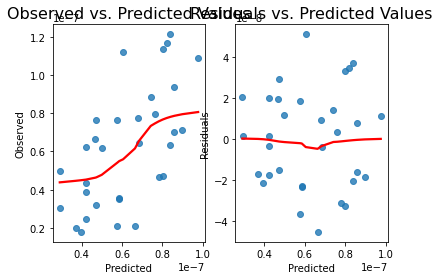

In [39]:
linearity_test(ls_clean, Y_clean)

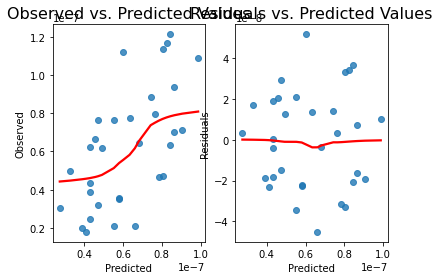

In [40]:
linearity_test(ls_main_clean, Y_clean)

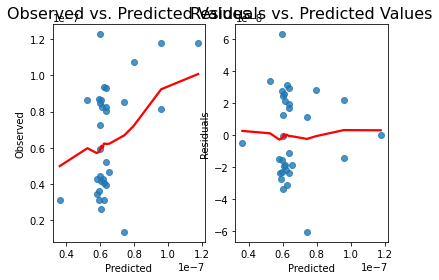

In [41]:
linearity_test(ls_noise, Y_noise)

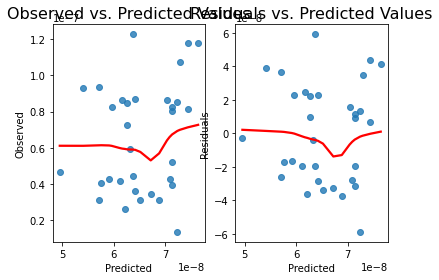

In [42]:
linearity_test(ls_main_noise, Y_noise)

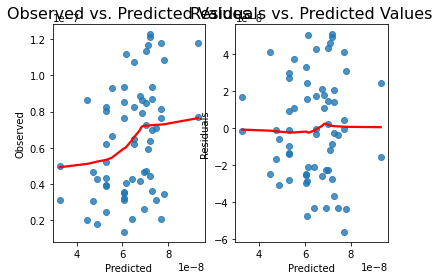

In [43]:
linearity_test(ls_lo, Y_lo)

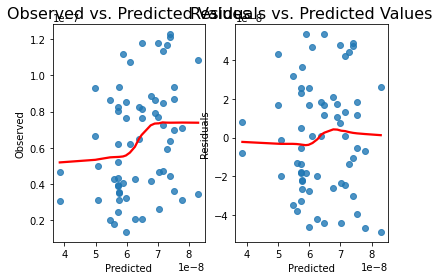

In [44]:
linearity_test(ls_main_lo, Y_lo)

## Check assumption of homoscedasticity

In [45]:
import statsmodels.stats.api as sms

In [46]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.284370
p-value                        0.515522
f-value                        0.717494
f p-value                      0.549889

 Goldfeld-Quandt test ----
                value
F statistic  1.135169
p-value      0.405849

 Residuals plots ----


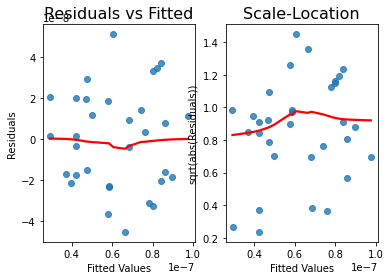

In [47]:
homoscedasticity_test(ls_clean)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.165081
p-value                        0.338734
f-value                        1.052246
f p-value                      0.362106

 Goldfeld-Quandt test ----
                value
F statistic  1.227367
p-value      0.353401

 Residuals plots ----


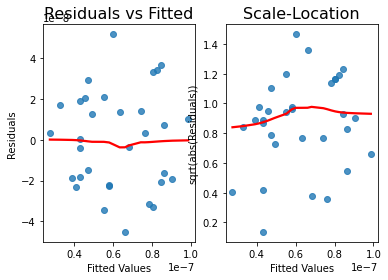

In [48]:
homoscedasticity_test(ls_main_clean)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.404207
p-value                        0.939372
f-value                        0.119402
f p-value                      0.947938

 Goldfeld-Quandt test ----
                value
F statistic  1.103159
p-value      0.425556

 Residuals plots ----


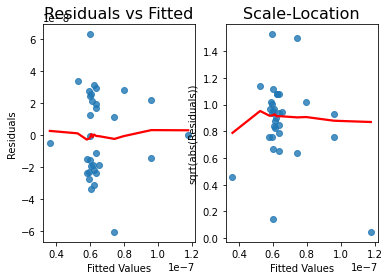

In [49]:
homoscedasticity_test(ls_noise)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  1.326337
p-value                        0.515216
f-value                        0.626984
f p-value                      0.541286

 Goldfeld-Quandt test ----
                value
F statistic  1.024354
p-value      0.479996

 Residuals plots ----


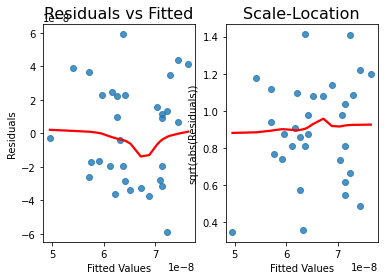

In [50]:
homoscedasticity_test(ls_main_noise)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.820765
p-value                        0.420093
f-value                        0.922131
f p-value                      0.435690

 Goldfeld-Quandt test ----
                value
F statistic  0.822482
p-value      0.695694

 Residuals plots ----


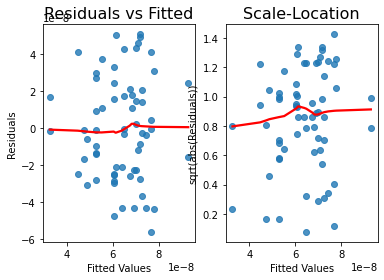

In [51]:
homoscedasticity_test(ls_lo)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.831502
p-value                        0.242743
f-value                        1.411851
f p-value                      0.251541

 Goldfeld-Quandt test ----
                value
F statistic  0.670457
p-value      0.856280

 Residuals plots ----


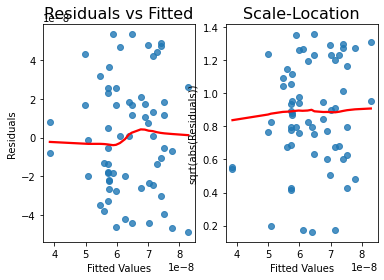

In [52]:
homoscedasticity_test(ls_main_lo)

## Check assumption of residual normality

In [53]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')


Jarque-Bera test ---- statistic: 1.0096, p-value: 0.603621351298115
Shapiro-Wilk test ---- statistic: 0.9760, p-value: 0.6764
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.3247, 5% critical value: 0.7150
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


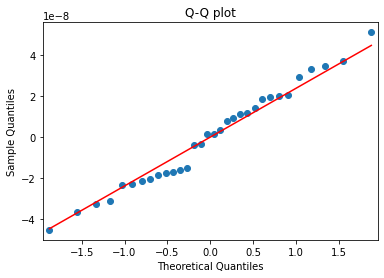

In [54]:
normality_of_residuals_test(ls_clean)

Jarque-Bera test ---- statistic: 1.1145, p-value: 0.5727925636817964
Shapiro-Wilk test ---- statistic: 0.9713, p-value: 0.5350
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.3918, 5% critical value: 0.7150
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


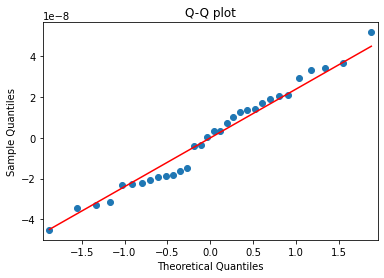

In [55]:
normality_of_residuals_test(ls_main_clean)

Jarque-Bera test ---- statistic: 0.3061, p-value: 0.8580779280065676
Shapiro-Wilk test ---- statistic: 0.9554, p-value: 0.2052
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.7176, 5% critical value: 0.7150
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


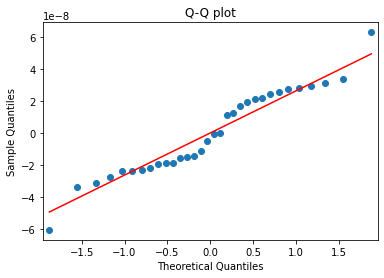

In [56]:
normality_of_residuals_test(ls_noise)

Jarque-Bera test ---- statistic: 1.3761, p-value: 0.5025479708572598
Shapiro-Wilk test ---- statistic: 0.9616, p-value: 0.3034
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.5326, 5% critical value: 0.7150
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


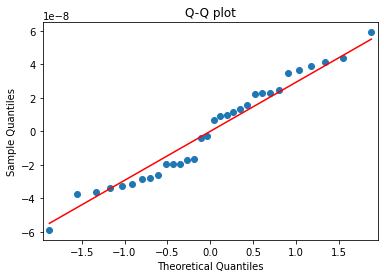

In [57]:
normality_of_residuals_test(ls_main_noise)

Jarque-Bera test ---- statistic: 2.4872, p-value: 0.288345889600089
Shapiro-Wilk test ---- statistic: 0.9706, p-value: 0.1307
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.4686, 5% critical value: 0.7450
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


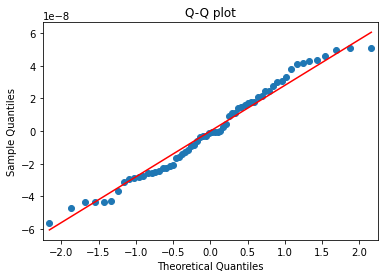

In [58]:
normality_of_residuals_test(ls_lo)

Jarque-Bera test ---- statistic: 2.9442, p-value: 0.2294464337161195
Shapiro-Wilk test ---- statistic: 0.9613, p-value: 0.0426
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.5609, 5% critical value: 0.7450
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


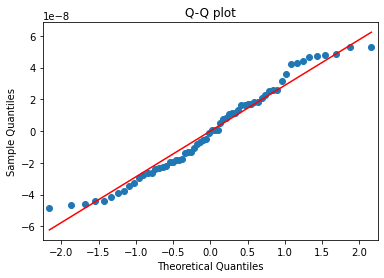

In [59]:
normality_of_residuals_test(ls_main_lo)

## Plotting

In [60]:
X_lo.columns

Index(['const', 'PTA', 'HL', 'interact'], dtype='object')

In [61]:
ls_clean.params

const       9.403583e-08
PTA        -3.112906e-09
HL          4.069921e-08
interact    7.694587e-10
dtype: float64

Text(0.5, 0, 'PTA')

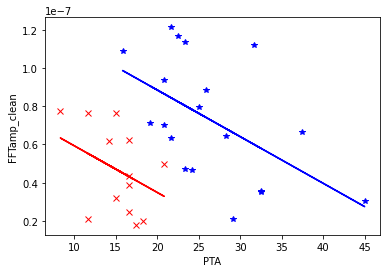

In [62]:
# clean (main model)
b0=ls_main_clean.params[0]
b1=ls_main_clean.params[1] # PTA
b2=ls_main_clean.params[2] # HL
#ls_main_clean=sm.OLS(Y_clean,X_main_clean).fit()

# NH (HL=0)
X_main_clean_NH=X_main_clean[X_main_clean['HL']==0]
plt.plot(X_main_clean_NH[x1], Y_clean[X_main_clean_NH.index], 'rx',label='NH')
#add linear regression line to scatterpcleant 
plt.plot(X_main_clean_NH[x1], b1*X_main_clean_NH[x1]+b0,'r-')

# HL (HL=1)
X_main_clean_HL=X_main_clean[X_main_clean['HL']==1]
plt.plot(X_main_clean_HL[x1], Y_clean[X_main_clean_HL.index], 'b*',label='HL')
#add linear regression line to scatterpcleant 
plt.plot(X_main_clean_HL[x1], b1*X_main_clean_HL[x1]+b0+b2,'b-')
plt.ylabel('FFTamp_clean')
plt.xlabel(x1)

In [63]:
#X_clean_NH

Text(0.5, 0, 'PTA')

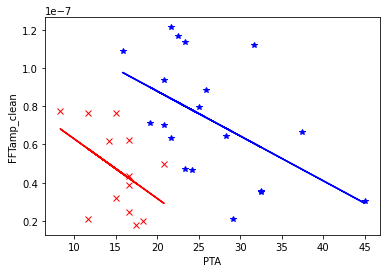

In [64]:
# clean (interaction model)
b0=ls_clean.params[0]
b1=ls_clean.params[1] # PTA
b2=ls_clean.params[2] # HL
b3=ls_clean.params[3] # PTA*HL
#b4=ls_clean.params[4] # age
# NH (HL=0)
X_clean_NH=X_clean[X_clean['HL']==0]
plt.plot(X_clean_NH[x1], Y_clean[X_clean_NH.index], 'rx',label='NH')
#add linear regression line to scatterpcleant 
plt.plot(X_clean_NH[x1], b1*X_clean_NH[x1]+b0,'r-')

# HL (HL=1)
X_clean_HL=X_clean[X_clean['HL']==1]
plt.plot(X_clean_HL[x1], Y_clean[X_clean_HL.index], 'b*',label='HL')
#add linear regression line to scatterpcleant 
plt.plot(X_clean_HL[x1], (b1+b3)*X_clean_HL[x1]+b0+b2,'b-')
plt.ylabel('FFTamp_clean')
plt.xlabel(x1)

In [65]:
x1

'PTA'

In [66]:
ls_clean.params

const       9.403583e-08
PTA        -3.112906e-09
HL          4.069921e-08
interact    7.694587e-10
dtype: float64

In [67]:
ls_main_clean.params

const    8.372801e-08
PTA     -2.440094e-09
HL       5.355461e-08
dtype: float64

In [68]:
data_clean_NH=data_clean[data_clean['HL']==0]
data_clean_HL=data_clean[data_clean['HL']==1]

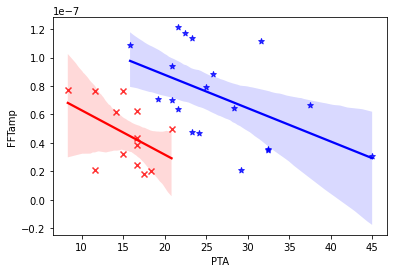

In [69]:
sns.regplot(data_clean_NH['PTA'], Y_lo[data_clean_NH.index],color='r',marker='x')
sns.regplot(data_clean_HL['PTA'], Y_lo[data_clean_HL.index],color='b',marker='*')
markers = {0: 'X', 1: 'X',2:'X'}
#sns.scatterplot(data=data_clean_NH,x='PTA',y='FFTamp',hue='PC_rank',palette='muted',markers=['x'])
#sns.scatterplot(data=data_clean_HL,x='PTA',y='FFTamp',hue='PC_rank',palette='muted')
#plt.legend(bbodata_to_anchor=(1, 0.8))

In [70]:
#data_clean_NH['PC_rank'].dtypes

Text(0.5, 0, 'PTA')

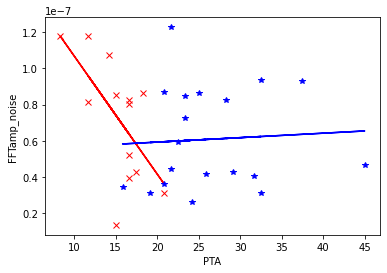

In [71]:
# noise (interaction model)
b0=ls_noise.params[0]
b1=ls_noise.params[1] # PTA
b2=ls_noise.params[2] # HL
b3=ls_noise.params[3] # PTA*HL
# NH (HL=0)
X_noise_NH=X_noise[X_noise['HL']==0]
plt.plot(X_noise_NH[x1], Y_noise[X_noise_NH.index], 'rx',label='NH')
#add linear regression line to scatterpnoiset 
plt.plot(X_noise_NH[x1], b1*X_noise_NH[x1]+b0,'r-')

# HL (HL=1)
X_noise_HL=X_noise[X_noise['HL']==1]
plt.plot(X_noise_HL[x1], Y_noise[X_noise_HL.index], 'b*',label='HL')
#add linear regression line to scatterpnoiset 
plt.plot(X_noise_HL[x1], (b1+b3)*X_noise_HL[x1]+b0+b2,'b-')
plt.ylabel('FFTamp_noise')
plt.xlabel(x1)

Text(0.5, 0, 'PTA')

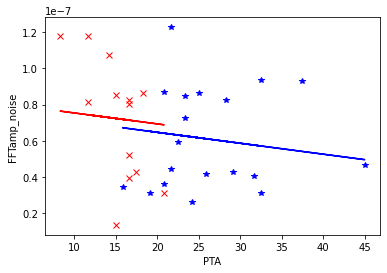

In [72]:
# noise (main model)
b0=ls_main_noise.params[0]
b1=ls_main_noise.params[1] # PTA
b2=ls_main_noise.params[2] # HL
#ls_main_noise=sm.OLS(Y_noise,X_main_noise).fit()

# NH (HL=0)
X_main_noise_NH=X_main_noise[X_main_noise['HL']==0]
plt.plot(X_main_noise_NH[x1], Y_noise[X_main_noise_NH.index], 'rx',label='NH')
#add linear regression line to scatterpnoiset 
plt.plot(X_main_noise_NH[x1], b1*X_main_noise_NH[x1]+b0,'r-')

# HL (HL=1)
X_main_noise_HL=X_main_noise[X_main_noise['HL']==1]
plt.plot(X_main_noise_HL[x1], Y_noise[X_main_noise_HL.index], 'b*',label='HL')
#add linear regression line to scatterpnoiset 
plt.plot(X_main_noise_HL[x1], b1*X_main_noise_HL[x1]+b0+b2,'b-')
plt.ylabel('FFTamp_noise')
plt.xlabel(x1)

<AxesSubplot:xlabel='PTA', ylabel='FFTamp'>

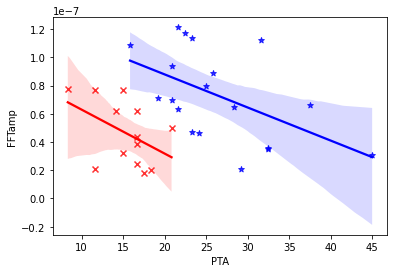

In [73]:
X_clean_NH=X_clean[X_clean['HL']==0]
X_clean_HL=X_clean[X_clean['HL']==1]

sns.regplot(X_clean_NH['PTA'], Y_clean[X_clean_NH.index],color='r',marker='x')
sns.regplot(X_clean_HL['PTA'], Y_clean[X_clean_HL.index],color='b',marker='*')

<AxesSubplot:xlabel='PTA', ylabel='FFTamp'>

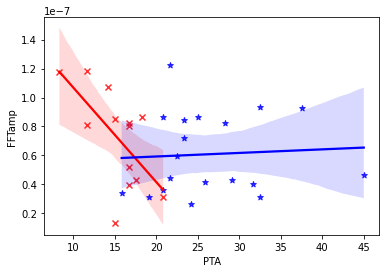

In [74]:
X_noise_NH=X_noise[X_noise['HL']==0]
X_noise_HL=X_noise[X_noise['HL']==1]

sns.regplot(X_noise_NH['PTA'], Y_noise[X_noise_NH.index],color='r',marker='x')
sns.regplot(X_noise_HL['PTA'], Y_noise[X_noise_HL.index],color='b',marker='*')